### Challenge Set 6
Topic:        Classification Errors

Date:         07/31/2016

Name:         sravanthi ponnana



In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [80]:
df = pd.read_csv('/Users/Manoj/Downloads/house-votes-84.data', header = None)

In [81]:
df = df.replace('y',1)
df = df.replace('n',0)
df = df.replace('?',np.nan)
df = df.fillna(df.mean())
df = df.replace('republican',0)
df = df.replace('democrat',1)
df[:5]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,1,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,1,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 1

In [82]:

X_train,X_test,y_train,y_test = train_test_split(df.values[:,1:],df.values[:,0],test_size=.30, random_state=4444)

In [83]:
print("Logistic Regression")
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))
print(precision_score(y_test, model.predict(X_test)))
print(recall_score(y_test, model.predict(X_test)))
print(f1_score(y_test, model.predict(X_test)))

Logistic Regression
0.93893129771
0.925925925926
0.974025974026
0.949367088608


In [84]:
print("K-Nearest Neighbours")
score = []
precision = []
recall = []
f1 =[]
for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    score.append(accuracy_score(y_test, neigh.predict(X_test)))
    precision.append(precision_score(y_test, neigh.predict(X_test)))
    recall.append(recall_score(y_test, neigh.predict(X_test)))
    f1.append(f1_score(y_test, neigh.predict(X_test)))
print("Accuracy score:")
score = np.array(score)
print(max(score)) 
index = np.where(score == max(score))
print(np.array(index)+1)
print("Precision:")
precision = np.array(precision)
print(max(precision)) 
index = np.where(precision == max(precision))
print(np.array(index)+1)
print("Recall:")
recall = np.array(recall)
print(max(recall)) 
index = np.where(recall == max(recall))
print(np.array(index)+1)
print("F1-score:")
f1 = np.array(f1)
print(max(f1)) 
index = np.where(f1 == max(f1))
print(np.array(index)+1)



K-Nearest Neighbours
Accuracy score:
0.931297709924
[[4 9]]
Precision:
0.959459459459
[[4]]
Recall:
0.948051948052
[[9]]
F1-score:
0.941935483871
[[9]]


In [85]:
print("Naive Bayes")
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(y_test, nb_model.predict(X_test)))
print("Precision score:",precision_score(y_test, nb_model.predict(X_test)))
print("Recall score:",recall_score(y_test, nb_model.predict(X_test)))
print("F1 score:",f1_score(y_test, nb_model.predict(X_test)))

Naive Bayes
Accuracy score: 0.93893129771
Precision score: 0.915662650602
Recall score: 0.987012987013
F1 score: 0.95


In [86]:
print("Support Vector machine")
svc_model = SVC()
svc_model.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(y_test, svc_model.predict(X_test)))
print("Precision score:",precision_score(y_test, svc_model.predict(X_test)))
print("Recall score:",recall_score(y_test, svc_model.predict(X_test)))
print("F1 score:",f1_score(y_test, svc_model.predict(X_test)))

Support Vector machine
Accuracy score: 0.954198473282
Precision score: 0.949367088608
Recall score: 0.974025974026
F1 score: 0.961538461538


In [87]:
print("Decision Tree")
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(y_test, DT_model.predict(X_test)))
print("Precision score:",precision_score(y_test, DT_model.predict(X_test)))
print("Recall score:",recall_score(y_test, DT_model.predict(X_test)))
print("F1 score:",f1_score(y_test, DT_model.predict(X_test)))

Decision Tree
Accuracy score: 0.946564885496
Precision score: 0.9375
Recall score: 0.974025974026
F1 score: 0.955414012739


In [88]:
print("Random Forest")
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print("Accuracy score:",accuracy_score(y_test, rf_model.predict(X_test)))
print("Precision score:",precision_score(y_test, rf_model.predict(X_test)))
print("Recall score:",recall_score(y_test, rf_model.predict(X_test)))
print("F1 score:",f1_score(y_test, rf_model.predict(X_test)))

Random Forest
Accuracy score: 0.954198473282
Precision score: 0.938271604938
Recall score: 0.987012987013
F1 score: 0.962025316456


### Challenge 2

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

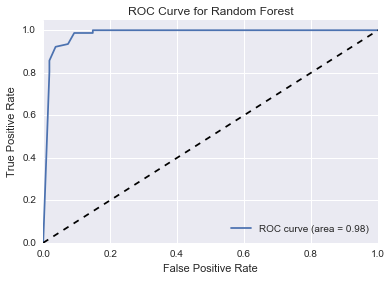

In [90]:
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


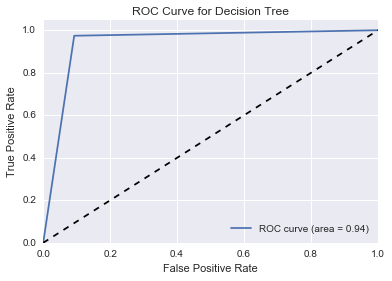

In [91]:
fpr, tpr, _ = roc_curve(y_test, DT_model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, DT_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0,1],[0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()



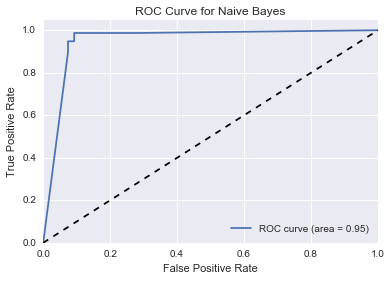

In [92]:
fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0,1],[0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

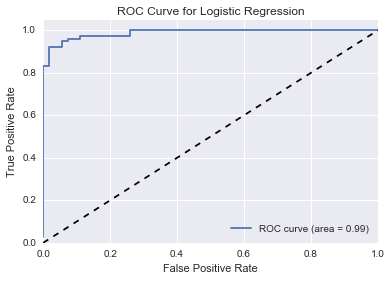

In [93]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0,1],[0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Challenge 3

In [94]:
from sklearn.cross_validation import cross_val_score
log_cross_score = cross_val_score(model, X_train, y_train)
mean_log_cross_score = np.mean(log_cross_score)
print("Logistic Regression")
print("Accuracy:",mean_log_cross_score)
print("Precision:",np.mean(cross_val_score(model, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(model, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(model, X_train, y_train, scoring = 'f1')))

Logistic Regression
Accuracy: 0.967190836731
Precision: 0.969213302379
Recall: 0.979001322751
F1-score: 0.973990712699


In [95]:
knn_cross_score = cross_val_score(neigh, X_train, y_train)
mean_knn_cross_score = np.mean(knn_cross_score)
print("K Nearest Neighbours")
print("Accuracy:",mean_knn_cross_score)
print("Precision:",np.mean(cross_val_score(neigh, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(neigh, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(neigh, X_train, y_train, scoring = 'f1')))

K Nearest Neighbours
Accuracy: 0.911311719407
Precision: 0.97095846962
Recall: 0.884424603175
F1-score: 0.925571662979


In [96]:
svc_cross_score = cross_val_score(svc_model, X_train, y_train)
mean_svc_cross_score = np.mean(svc_cross_score)
print("SVM")
print("Accuracy:",mean_svc_cross_score)
print("Precision:",np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'f1')))

SVM
Accuracy: 0.963922862875
Precision: 0.98378003296
Recall: 0.95808531746
F1-score: 0.970665983956


In [97]:
gauss_cross_score = cross_val_score(nb_model, X_train, y_train)
mean_gauss_cross_score = np.mean(gauss_cross_score)
print("Naive Bayes")
print("Accuracy:",mean_gauss_cross_score)
print("Precision:",np.mean(cross_val_score(nb_model, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(nb_model, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(nb_model, X_train, y_train, scoring = 'f1')))

Naive Bayes
Accuracy: 0.927748657219
Precision: 0.9469192695
Recall: 0.937003968254
F1-score: 0.941922259718


In [98]:
dtc_cross_score = cross_val_score(DT_model, X_train, y_train)
mean_dtc_cross_score = np.mean(dtc_cross_score)
print("Decision Trees")
print("Accuracy:",mean_dtc_cross_score)
print("Precision:",np.mean(cross_val_score(DT_model, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(DT_model, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(DT_model, X_train, y_train, scoring = 'f1')))

Decision Trees
Accuracy: 0.94742121271
Precision: 0.963358147229
Recall: 0.957837301587
F1-score: 0.960486352357


In [99]:
rfc_cross_score = cross_val_score(rf_model, X_train, y_train)
mean_rfc_cross_score = np.mean(rfc_cross_score)
print("Random forest")
print("Accuracy:",mean_rfc_cross_score)
print("Precision:",np.mean(cross_val_score(rf_model, X_train, y_train, scoring = 'precision')))
print("Recall:",np.mean(cross_val_score(rf_model, X_train, y_train, scoring = 'recall')))
print("F1-score:",np.mean(cross_val_score(rf_model, X_train, y_train, scoring = 'f1')))

Random forest
Accuracy: 0.954086585129
Precision: 0.983333333333
Recall: 0.937003968254
F1-score: 0.960083290664


### Challenge 4

In [103]:
movies = pd.read_csv('/Users/Manoj/Documents/metis/2013_movies.csv')

In [121]:
movies = movies.dropna()
X = movies[["Budget","DomesticTotalGross","Runtime"]]
y = movies["Rating"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444,stratify = y)


In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', fit_intercept=True)
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))

0.615384615385


In [124]:
movies["Rating"].value_counts()

PG-13    40
R        33
PG       14
Name: Rating, dtype: int64

In [128]:
result = precision_recall_fscore_support(y_test, model.predict(X_test), average=None, labels=['PG-13', 'R', 'PG'])
print("Precision for 'PG-13', 'R', 'PG' :\t",result[0])
print("Recall for 'PG-13', 'R', 'PG' :\t",result[1])
print("F1 score for 'PG-13', 'R', 'PG' :\t",result[2])

Precision for 'PG-13', 'R', 'PG' :	 [ 0.55        0.83333333  0.        ]
Recall for 'PG-13', 'R', 'PG' :	 [ 0.91666667  0.5         0.        ]
F1 score for 'PG-13', 'R', 'PG' :	 [ 0.6875  0.625   0.    ]


/Users/Manoj/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Challenge 5

In [41]:
survival_data = pd.read_csv('/Users/Manoj/Downloads/haberman.data', names=['age', 'year', 'pos_nodes', 'survival_status'])

In [42]:
survival_data["survival_status"] = survival_data["survival_status"].replace(2,0)

survival_data[:5]

,age,year,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(survival_data.values[:,[0,1,2]],survival_data.values[:,3], test_size=.30, random_state=4444)
model = LogisticRegression()
model.fit(X_train, y_train) 
print(accuracy_score(y_test, model.predict(X_test)))

0.815217391304


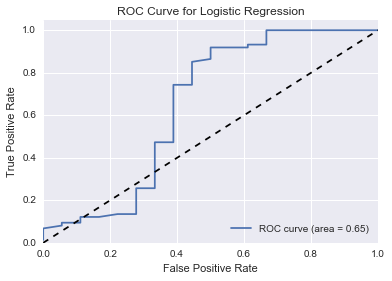

In [48]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0,1],[0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()